In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn

data_path = './../../data/processed/'

import json
vardict = json.load(open("variables.json"))
def add_entry(vardict, name, element):
    vardict[name]= element
    return vardict

# args = ['variable2', x.]
# res = add_entry(vardict, *args)

In [2]:

# for col in ['CN ID 8']:#, 'CPA6', 'ID', 'VAT', 'DEPT', 'PYOD']:
    
#     df = pd.read_csv(data_path + col.replace(' ', '_')+'_YM.csv')
#     df['date'] = pd.DatetimeIndex(pd.to_datetime(12*(df.YEAR - 1997) + df.MONTH, unit='M', origin=pd.Timestamp('1996-12-15'))).round('D')
    
#     x = df.nunique()

In [3]:

# f = open("variables.json","w")
# f.write(json.dumps(res))
# f.close()

In [4]:
# fig, axs = plt.subplots(5, 2, figsize = (15, 25), sharey = True)

# for j, col in enumerate(['CN ID 4', 'CN ID 8', 'CPA6', 'PYOD', 'ID']): #, 'ID', 'VAT'
#     df = pd.read_csv(data_path + col.replace(' ', '_')+'_YM.csv')
#     df['date'] = pd.DatetimeIndex(pd.to_datetime(12*(df.YEAR - 1997) + df.MONTH, unit='M', origin=pd.Timestamp('1996-12-15'))).round('D')

#     n_prods = df.groupby(['IMPORT','YEAR','MONTH'])[[col]].nunique().unstack(0)
#     n_prods.index = pd.date_range('1997-01-01', '2013-12-31', freq = 'M')
    
#     for i in [1, 0]:
#         ax = axs[j][i]
#         prod_month = df.loc[df.IMPORT == i].groupby([col, 'date'])[['VART']].sum().reset_index()
#         prod_month['month_rank'] = prod_month.groupby('date')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'))

#         rank_vals = prod_month.set_index(['month_rank', 'date'])[['VART']].unstack()
#         rank_vals_cs = (rank_vals.cumsum()/rank_vals.sum()).fillna(1)

#         effective_n_series = rank_vals_cs['VART']
#         effective_n_series.columns = pd.DatetimeIndex(n_prods.index)

#         ax.plot(n_prods[col][i], marker = '.', lw = 0)

#         ax.plot((effective_n_series < .9).sum(), marker = '.', lw = 0)
#         ax.plot((effective_n_series < .99).sum(), marker = '.', lw = 0)
#         ax.plot((effective_n_series < .999).sum(), marker = '.', lw = 0)
#         ax.set_ylim(0,)
#         ax.set_ylabel(col+' #')
#         # plt.legend(['Exports', 'Imports'])
#         ax.set_title(['Exports', 'Imports'][i])
        
# plt.savefig('./../../../thesis_writing/figures/n_monthly_control.png', dpi = 300)
# plt.tight_layout()
# plt.show()

## Effective number of products, buyers and destinations that firms have.

In [5]:
# import dask.dataframe as dd
# from dask.diagnostics import ProgressBar

# from functions import chunk, agg, finalize
# tunique = dd.Aggregation('tunique', chunk, agg,finalize)
# first = dd.Aggregation('first', chunk, agg,finalize)

In [6]:
# wn_ID_distrib_list = []
# for col in ['CN ID 4', 'PYOD', 'VAT']:
#     print(col)
#     df = dd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv')
# #     df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv') 
#     df = df.loc[df.YEAR > 2011]
# #     df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 50000))]
#     df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year
# #     df['date'] = pd.DatetimeIndex(pd.to_datetime(df.YEAR - 1997, unit='Y', origin=pd.Timestamp('1996-12-15'))).round('D')
    
#     wn_ID_distrib_list_j = []
#     for i in [0, 1]:
# #         ax = axs[i]

#         if (i == 1 and col == 'VAT'): 
#             wn_ID_distrib = [] # There's no info of VAT for imports
#         else:

#             # Distribution within firms (ID) (ex prod month)
#             wn_ID_distrib = df.loc[df.IMPORT == i].groupby([col, 'ID'])[['VART']].sum().reset_index()
#             wn_ID_distrib['rank'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'), meta=('x', 'f8'))

# #             wn_ID_distrib = wn_ID_distrib.sort_values(by = ['ID', 'rank'])
#             wn_ID_distrib['ID_rank'] = wn_ID_distrib['ID'].astype(str) + '_' + wn_ID_distrib['rank'].astype(int).astype(str).str.zfill(5)
#             wn_ID_distrib = wn_ID_distrib.set_index('ID_rank')#.sort_index().reset_index(drop = True)
#             wn_ID_distrib['cs_VART'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.cumsum(), meta=('x', 'f8'))

#             # DD debug...
#             # wn_ID_distrib.known_divisions

#             # y_pred = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.cumsum(), meta=('x', 'f8'))

#             # df3 = wn_ID_distrib.assign(e=dd.from_array(y_pred))
#             # #     wn_ID_distrib['cs_VART'] = 
#             # df3.head()

#             wn_ID_distrib['pdf_ID'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x / float(x.sum()), meta=('x', 'f8'))
#             wn_ID_distrib['cdf_ID'] = wn_ID_distrib.groupby('ID')['cs_VART'].apply(lambda x: x / float(x.max()), meta=('x', 'f8'))

#             with ProgressBar():
#                 wn_ID_distrib = wn_ID_distrib.compute()
            
#         wn_ID_distrib_list_j += [wn_ID_distrib] # A list for each of the columns (products, countries, VAT)
#     wn_ID_distrib_list += [wn_ID_distrib_list_j] # This list has the summary results, used for ex. for barcharts


In [7]:
wn_ID_distrib_list = []
for col in ['CN ID 4', 'PYOD', 'VAT']:
    print(col)
    df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv') # Comment for full hd plot
    df = df.loc[df.YEAR > 2010]
#     df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 50000))]
    df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year
#     df['date'] = pd.DatetimeIndex(pd.to_datetime(df.YEAR - 1997, unit='Y', origin=pd.Timestamp('1996-12-15'))).round('D')
    
    n_prods = df.groupby(['IMPORT','ID'])[[col]].nunique().unstack(0)
#     n_prods.index = pd.date_range(sy+'-01-01', '2013-12-31', freq = 'M')

#     fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
#     fig.suptitle('Effective nunique '+col, fontsize=12)
    
    wn_ID_distrib_list_j = []
    for i in [0, 1]:
#         ax = axs[i]

        if (i == 1 and col == 'VAT'): 
            wn_ID_distrib = [] # There's no info of VAT for imports
        else:

            # Distribution within firms (ID) (ex prod month)
            wn_ID_distrib = df.loc[df.IMPORT == i].groupby([col, 'ID'])[['VART']].sum().reset_index()
            wn_ID_distrib['rank'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'))

            wn_ID_distrib = wn_ID_distrib.sort_values(by = ['ID', 'rank'])
            wn_ID_distrib['cs_VART'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x.cumsum())

            wn_ID_distrib['pdf_ID'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x / float(x.sum()))
            wn_ID_distrib['cdf_ID'] = wn_ID_distrib.groupby('ID')[['cs_VART']].apply(lambda x: x / float(x.max()))

#             ax.plot(n_prods[col][i].sort_values(ascending = False).reset_index(drop = 'True'), marker = '.', lw = 0)

#             for cut in [.9, .99, .999]:
#                 effective_nunique = wn_ID_distrib.loc[wn_ID_distrib.cdf_ID < cut].groupby('ID')[col].count()
#                 effective_nunique = effective_nunique.sort_values(ascending = False)
#                 ax.plot(effective_nunique.reset_index(drop = 'True'), marker = '.', lw = 0)

#             ax.set_yscale('log')
#             ax.set_xscale('log')

        wn_ID_distrib_list_j += [wn_ID_distrib] # A list for each of the columns (products, countries, VAT)
    wn_ID_distrib_list += [wn_ID_distrib_list_j] # This list has the summary results, used for ex. for barcharts
#     plt.show()

CN ID 4
PYOD
VAT


In [21]:
# # save cause it takes for ages to compute...
# for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):  
#     for i in [0, 1]:
#         wn_ID_distrib = wn_ID_distrib_list[j][i].reset_index(drop = True)
#         wn_ID_distrib.to_csv('./../../data/processed/wn_ID_distrib_'+col.replace(' ','_')+'_'+['Exp', 'Imp'][i],
#                              index = False)

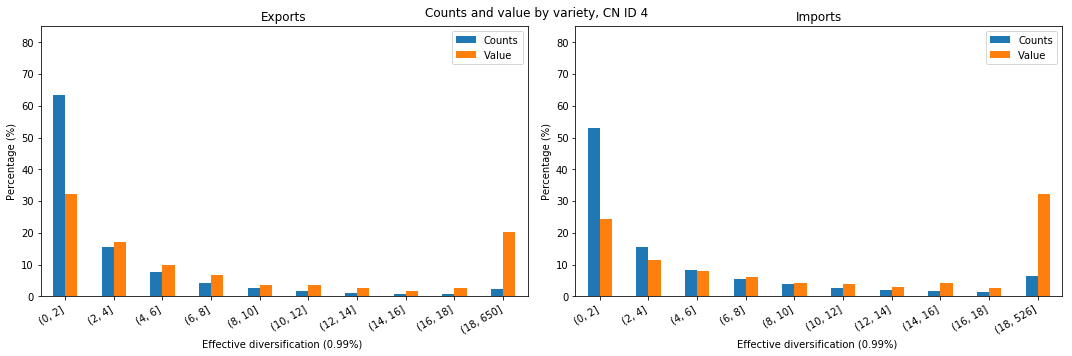

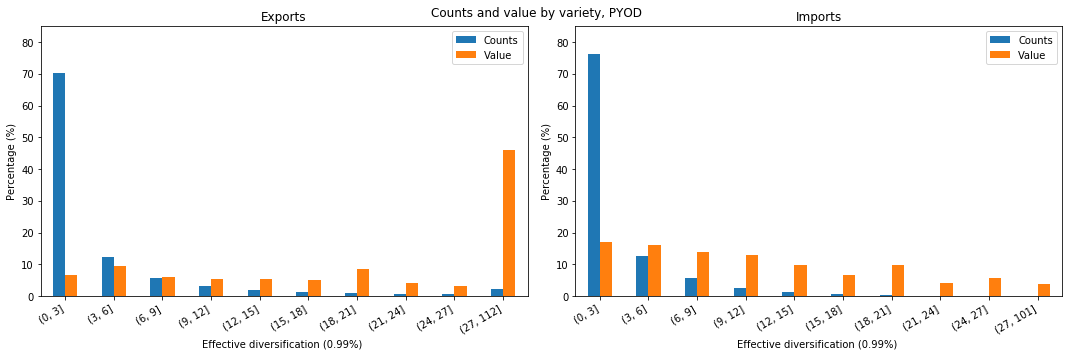

FileNotFoundError: [Errno 2] File b'./../../data/processed/wn_ID_distrib_VAT_Imp' does not exist: b'./../../data/processed/wn_ID_distrib_VAT_Imp'

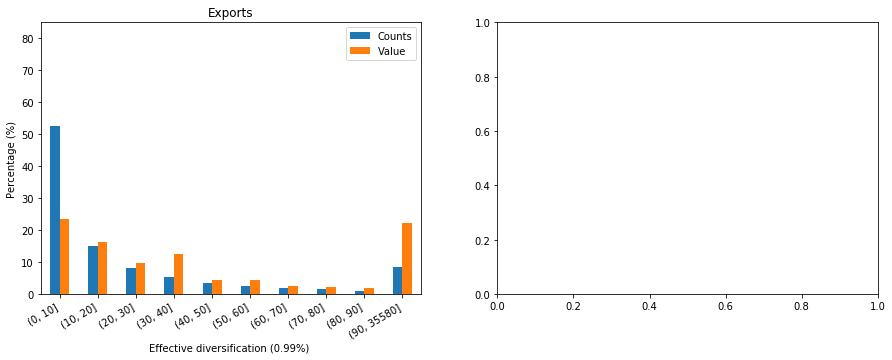

In [4]:


for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):
    fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
    if col != 'VAT': fig.suptitle('Counts and value by variety, '+col, fontsize=12)
  
    info_list = []
    for i in [0, 1]:
        ax = axs[i]
        
#         wn_ID_distrib = wn_ID_distrib_list[j][i]
        
        ax.set_title(['Exports', 'Imports'][i])
        
        if (i == 1 and col == 'VAT'): 
            ax.set_axis_off()
            ax.set_title('')

        else:
            wn_ID_distrib = pd.read_csv('./../../data/processed/wn_ID_distrib_'+col.replace(' ','_')+'_'+['Exp', 'Imp'][i])
            nunique_cols = []
            for cut in [.9, .99, .999]:
                count = wn_ID_distrib.loc[(wn_ID_distrib.cdf_ID < cut)].groupby('ID')[[col]].count()
                count = count.reindex(wn_ID_distrib.ID.unique()).fillna(0).astype(int) + 1 #this is to count passing the threshold.
                count.columns = [cut]
                nunique_cols += [count]

            effective_nunique = pd.concat(nunique_cols, axis = 1)

            nunique = wn_ID_distrib.groupby('ID')[[col]].nunique(); nunique.columns = ['nunique']

            ID_sum = wn_ID_distrib.groupby('ID')[['VART']].sum()

            effective_divers = pd.concat([ID_sum, nunique, effective_nunique], axis = 1).fillna(1).astype(int)
            
            clip = [20, 30, 100][j]
            effective_divers = pd.concat([ID_sum, nunique.clip(0, clip), effective_nunique.clip(0, clip)], axis = 1).fillna(1).astype(int)
            
            cut_col = 0.99
            bins = pd.cut(effective_divers[cut_col], np.arange(0, clip + clip/10, clip/10))
            distrib_of_nunique = effective_divers.groupby(bins)[['VART']].agg(['count', 'sum'])
            distrib_of_nunique_pct = 100*distrib_of_nunique/distrib_of_nunique.sum()
            distrib_of_nunique_pct.plot(kind = 'bar', ax = ax)
            lbs = ['(%d, %d]'%(edges.left, edges.right) for edges in distrib_of_nunique.index]
            lbs[-1] = lbs[-1].split(',')[0]+', '+str(int(effective_nunique[cut_col].max()))+']' # fix last one
            ax.set_xticklabels(lbs, rotation = 30, ha = 'right')
            ax.set_xlabel('Effective diversification (' + str(cut_col) + '%) ')
            ax.set_ylabel('Percentage (%)')
            ax.set_ylim(0, 85)
            ax.legend(['Counts', 'Value'])
            
#         info_list += [info]
            
    plt.savefig('./../../../thesis_writing/figures/effective_divers_'+col.replace(' ', '_')+'.png', dpi = 300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()

# Lorentz curves
Star here for 2D barcharts

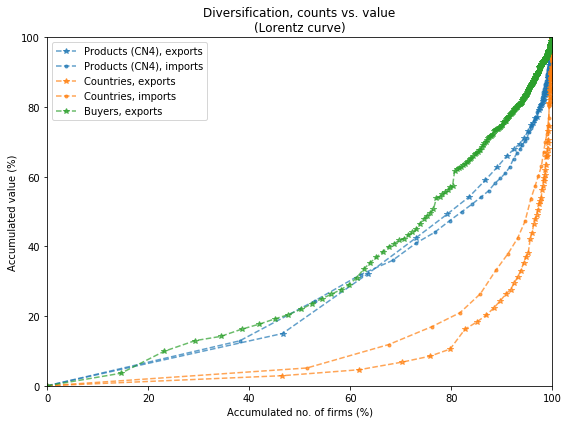

In [4]:

fig, axs = plt.subplots(1, figsize = (8, 6))
ax = axs
ax.set_title('Diversification, counts vs. value\n(Lorentz curve)')    
info_list = []
effective_divers_info_list = []
for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):
  
    info_list_ = []
    effective_divers_info_list_ = []
    for i in [0, 1]:
#         wn_ID_distrib = wn_ID_distrib_list[j][i]
        
        if (i == 1 and col == 'VAT'): 
            info_list_ = []
            effective_divers_info_list_ = []

        else:
            wn_ID_distrib = pd.read_csv('./../../data/processed/wn_ID_distrib_'+col.replace(' ','_')+'_'+['Exp', 'Imp'][i])
            nunique_cols = []
            for cut in [.9, .99, .999]:
                count = wn_ID_distrib.loc[(wn_ID_distrib.cdf_ID < cut)].groupby('ID')[[col]].count()
                count = count.reindex(wn_ID_distrib.ID.unique()).fillna(0).astype(int) + 1 #this is to count passing the threshold.

                count.columns = [cut]
                nunique_cols += [count]

            effective_nunique = pd.concat(nunique_cols, axis = 1)

            nunique = wn_ID_distrib.groupby('ID')[[col]].nunique(); nunique.columns = ['nunique']

            ID_sum = wn_ID_distrib.groupby('ID')[['VART']].sum()

            effective_divers = pd.concat([ID_sum, nunique, effective_nunique], axis = 1).fillna(1).astype(int)
            
            cut_col = .99
            info = effective_divers.groupby(cut_col)[['VART']].agg(['count', 'sum'])
            info = 100*(info/info.sum())
            info.loc[0] = [0, 0]; info = info.sort_index()
            info.cumsum()['VART'].plot(x = 'count', y = 'sum', ax = ax, marker = ['*', '.'][i], 
                                       color = ['#1f77b4', '#ff7f0e', '#2ca02c'][j], linestyle = '--', alpha = .7,
                                      label = ['Products (CN4), ', 'Countries, ', 'Buyers, '][j] + ['exports', 'imports'][i])

            ax.set_xlim(0, 100); ax.set_ylim(0, 100)
            ax.set_xlabel('Accumulated no. of firms (%)'); ax.set_ylabel('Accumulated value (%)')
            ax.legend()

        effective_divers_info_list_ += [effective_divers]
        info_list_ += [info]
    effective_divers_info_list += [effective_divers_info_list_]
    info_list += [info_list_]    
plt.savefig('./../../../thesis_writing/figures/Lorentz_curve_'+str(cut_col)+'.png', dpi = 300)
plt.tight_layout()
plt.show()

#d62728 #9467bd #8c564b  #e377c2 #7f7f7f #bcbd22 #17becf 

In [ ]:
# Save results 
# (Lorentz curve)
varnames_list = []

col = 'PYOD'
for i in [0, 1]:     # this is j
    info = info_list[1][i]['VART']#_list[i]
    
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_div1cnt'
    var_value = info.loc[1]['count'].round(1)
    varnames_list += [[varname, str(var_value)]]
    
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_div1val'
    var_value = info.loc[1]['sum'].round(1)
    varnames_list += [[varname, str(var_value)]]
    
    ###
    
    inv_cumsum = info.sort_index(ascending = False).cumsum()

    row = inv_cumsum.loc[inv_cumsum['sum'] > 65].iloc[0]
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_6610cnt'
    var_value = row['count'].round(1)
    varnames_list += [[varname, str(var_value)]]
    
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_6610val'
    var_value = row['sum'].round(1)
    varnames_list += [[varname, str(var_value)]]
    
    ###
    
    row = inv_cumsum.loc[inv_cumsum['sum'] > 79].iloc[0]
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_8020cnt'
    var_value = row['count'].round(1)
    varnames_list += [[varname, str(var_value)]]
    
    varname = 'Lorentz'+['Exports', 'Imports'][i][:3]+'_'+col+'_8020val'
    var_value = row['sum'].round(1)
    varnames_list += [[varname, str(var_value)]]
            
    for name in varnames_list:
        res = add_entry(vardict, *name)

    f = open("variables.json","w")
    f.write(json.dumps(res))
    f.close()

varnames_list

# 2D barchart. Counts, value, M, X

In [5]:
# Counts and value by diversification. '2D' barcharts seen from above (xD) i.e. matrixplot

# As a result we got info_list, which tells us the counts and value by the level of diversification at a cut level we chose

# The three items are for each of the variables, ['CN ID 4', 'PYOD', 'VAT'], and each one has two elements, the first one for exports and the other one for imports

In [6]:
df_list = []
for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):
    for i, flux in enumerate(['Exports','Imports']):
        if col != 'VAT' or flux != 'Imports':
            df_ = effective_divers_info_list[j][i]
            df_.columns = pd.MultiIndex.from_product([[flux], df_.columns, [col]])
            df_list += [df_]
result = pd.concat(df_list, axis = 1)

In [9]:
import seaborn as sns

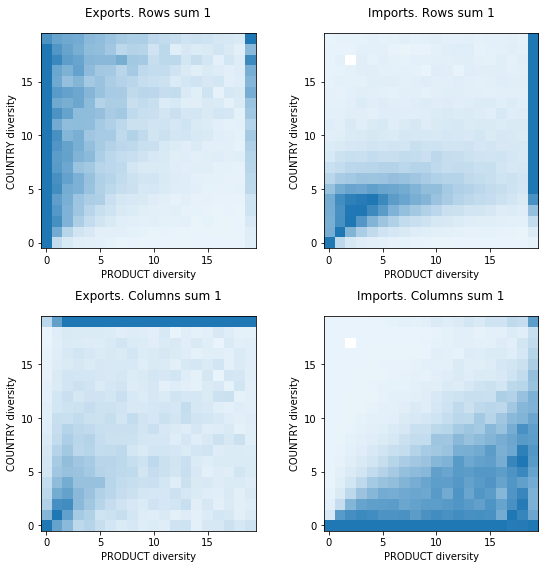

In [41]:
# Display matrix
fig, axs = plt.subplots(2, 2, figsize = (9, 9))

# for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):

ordered_axes = ['PYOD', 'CN ID 4']

type_ = 'count'
# color = ["#1f77b4", "#ff7f0e"][k]

for k, direction in enumerate(['HOR', 'VER']):
    for i, flux in enumerate(['Exports','Imports']):
        id_varts = result[flux]['VART'].iloc[:, 1]; id_varts.name = 'VART'
        source_info = pd.concat([id_varts, result[flux][0.99]], axis = 1).dropna()
        #option to transform here, (eg sqrt or something) Also clipping..
        source_info.iloc[:, 1:] = source_info.iloc[:, 1:].clip(1, 20)
        outcome = source_info.groupby(ordered_axes)['VART'].agg(['count', 'sum'])

        outcome_count = outcome[type_].unstack()#.sort_index(ascending = False)
        
        if direction == 'VER':
            # cols sum to 1
            outcome_count = outcome_count/outcome_count.sum()
            outcome_count = outcome_count/outcome_count.max()

        if direction == 'HOR':
            #rows sum to 1
            outcome_count = outcome_count.div(outcome_count.sum(1), 0)
            outcome_count = outcome_count.div(outcome_count.max(1), 0)

        ax = axs[k][i]
        color = '#1f77b4'
#         ax.matshow(np.sqrt(outcome_count), cmap=sns.light_palette(color, as_cmap = True))
        ax.matshow((outcome_count), cmap=sns.light_palette(color, as_cmap = True))
        ax.set_title(["Exports", "Imports"][i] + '. ' + ["Rows sum 1", "Columns sum 1"][k])
        ax.set_xlabel('PRODUCT diversity')
        ax.set_ylabel('COUNTRY diversity')
#         ax.set_xlabel(ordered_axes[1])
#         ax.set_ylabel(ordered_axes[0])
        ax.xaxis.set_ticks_position('bottom')
        ax.invert_yaxis()


plt.tight_layout()
plt.savefig('./../../../thesis_writing/figures/2D_diversity.png', bbox_inches='tight')
plt.show()

#1f77b4 counts
#ff7f0e value

# Older

In [ ]:
xx

In [ ]:
# for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):
#     df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv')
#     df = df.loc[df.YEAR > 2010]
#     df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 10000))]
#     df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year
    
#     n_prods = df.groupby(['IMPORT','ID'])[[col]].nunique().unstack(0)

#     fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
#     fig.suptitle('Effective nunique '+col, fontsize=12)
    
#     for i in [1, 0]:
#         ax = axs[i]

#         if (i == 1 and col == 'VAT'): pass
#         else:

#             # Distribution within firms (ID) (ex prod month)
#             wn_ID_distrib = df.loc[df.IMPORT == i].groupby([col, 'ID'])[['VART']].sum().reset_index()
#             wn_ID_distrib['rank'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'))

#             wn_ID_distrib = wn_ID_distrib.sort_values(by = ['ID', 'rank'])
#             wn_ID_distrib['cs_VART'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x.cumsum())

#             wn_ID_distrib['pdf_ID'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x / float(x.sum()))
#             wn_ID_distrib['cdf_ID'] = wn_ID_distrib.groupby('ID')[['cs_VART']].apply(lambda x: x / float(x.max()))

#             nunique_cols = []
#             for cut in [.9, .99, .999]:
#                 effective_nunique = wn_ID_distrib.loc[wn_ID_distrib.cdf_ID < cut].groupby('ID')[[col]].count()
#                 effective_nunique.columns = [cut]
#                 nunique_cols += [effective_nunique]

#             effective_nunique = pd.concat(nunique_cols, axis = 1)
#             nunique = wn_ID_distrib.groupby('ID')[[col]].nunique(); nunique.columns = ['nunique']
#             ID_sum = wn_ID_distrib.groupby('ID')[['VART']].sum()

#             clip = [15, 30, 30][j]
#             effective_divers = pd.concat([ID_sum, nunique.clip(0, clip), effective_nunique.clip(0, clip)], axis = 1).fillna(1).astype(int)
            
#             distrib_of_nunique = effective_divers.groupby(0.99)[['VART']].agg(['count', 'sum'])
#             distrib_of_nunique = distrib_of_nunique/distrib_of_nunique.sum()
#             distrib_of_nunique.plot(kind = 'bar', ax = ax)

#     plt.show()

In [ ]:
import seaborn as sns
data

In [ ]:
# n = 5
select_firms = effective_divers.loc[effective_divers[0.999] > n].index.values
data = wn_ID_distrib.loc[wn_ID_distrib.ID.isin(select_firms)]
data = data.loc[data['rank'] < 20]#.sample(10000)
# data['pdf_ID'] = data['pdf_ID']*data['rank']
# data['pdf_ID'] = 1/data['pdf_ID']

fig, ax = plt.subplots(1, figsize = (15, 8))
ax.axhline(0, c = '.7')
ax = sns.violinplot(x="rank", y="pdf_ID", data=data, bw = .2, linewidth = .7, color = '.5')
# ax.set_ylim(0, 1000)
# ax.set_yscale()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

select_firms = effective_divers.loc[effective_divers[0.999] > 10].index.values
data = wn_ID_distrib.loc[wn_ID_distrib.ID.isin(select_firms)]
data = data.loc[data['rank'] < 100]#.sample(10000)
data['log_rank'] = np.log10(data['rank'])
data['log_rank_bin'] = pd.cut(data['log_rank'], np.arange(-.01, 2, 0.05))
data['log_pdf_ID'] = np.log10(data['pdf_ID'])

gpr = 'log_rank_bin'
grouped = data.groupby(gpr)[['log_rank', 'log_pdf_ID']]
grouped.quantile(.9).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.quantile(.75).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.mean().plot(x = 'log_rank', y = 'log_pdf_ID', marker = '.', ax = ax)
grouped.quantile(.25).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.quantile(.1).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)

plt.show()

In [ ]:
plt.hist(sorted(np.log10(wn_ID_distrib['pdf_ID']).replace(-np.inf, np.nan).dropna().values)[-500000:], 80)
plt.yscale('log')
# plt.ylim(1e2, 2e4)
plt.show()

In [ ]:
np.power(10, -.2)